# Optimization Lab 6
Alfons Cordoba / Mateusz Dorobek / Emilio Tylson Baixauli 

# Data generation

In [24]:
from sklearn.datasets import make_blobs

def load_data(n_samples = 1000, n_features = 10, class_no = 2, cluster_std = 0.5, random_state=0):
    X, y = make_blobs(n_samples=n_samples, centers=class_no, n_features=n_features, cluster_std=cluster_std, random_state=random_state)
    y[y == 0] = -1
    return X, y

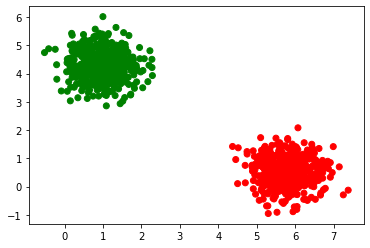

In [25]:
import matplotlib.pyplot as plt
def plot_data(X, y):
    colors = ['r' if i == 1 else 'g' for i in y]
    plt.scatter(X[:, 0], X[:, 1], color=colors)
    plt.show()

X, y = load_data()
plot_data(X, y)

# Experiments

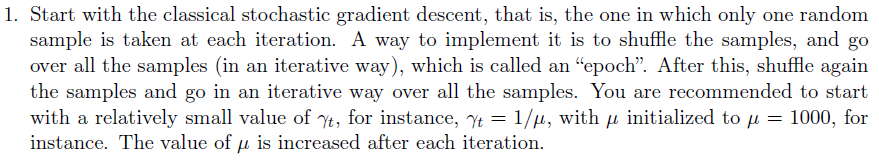

In [5]:
import numpy as np

def fun(w, b, X, y, K):
    return (1/2)*(w.T@w) + K*np.sum(np.maximum(np.zeros(y.shape), y*(X@w+b)))

In [53]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold


def stochastic_gradient(X, y, K=100, n_batch=1, n_epochs=100, plot=False):
    mi = 1000
    gamma = 1 / mi

    w_t = w = np.zeros((X.shape[1]))
    b_t = b = 0
    history = []

    batch_size = y.shape[0] / n_batch
    assert batch_size % 1 == 0
    batch_size = int(batch_size)

    for t in range(n_epochs):
        X_s, y_s = shuffle(X, y)
        mi *= 1.1
        gamma_t = 1 / mi
        for batch_idx in range(n_batch):
            X_b = X_s[batch_idx * batch_size:(batch_idx + 1) * batch_size, :]
            y_b = y_s[batch_idx * batch_size:(batch_idx + 1) * batch_size]
            for X_t, y_t in zip(X_b, y_b):
                if y_t * (X_t @ w + b) > 1:
                    w_t -= gamma_t * w
                else:
                    w_t -= gamma_t * w - (y_t * X_t)
                    b_t -= gamma_t * (-y_t)
            w = w_t
            b = b_t
        history.append(np.log(fun(w, b, X, y, K)))
    print("Achieved result: %.2f" % history[-1])
    if plot:
        plt.plot(history)
        if n_batch == 1:
            plt.title("Classical Stochastic Gradient for SVM")
        else:
            plt.title("Minibatch Stochastic Gradient for SVM")
        plt.ylabel("ln(f(x))")
        plt.xlabel("Iterations")
        plt.show()

Achieved result: 14.96


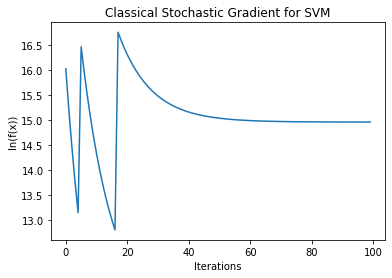

In [54]:
X, y = load_data(n_samples=1000, n_features=10)
stochastic_gradient(X, y, n_epochs=100, plot=True)

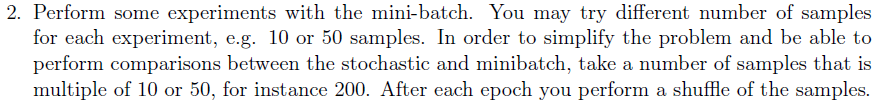

Achieved result: 14.91


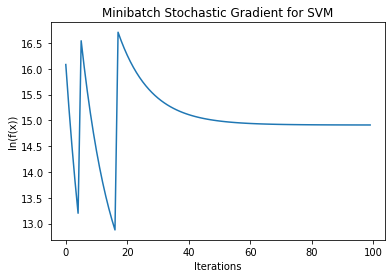

In [55]:
stochastic_gradient(X, y, n_batch=20, n_epochs=100, plot=True)

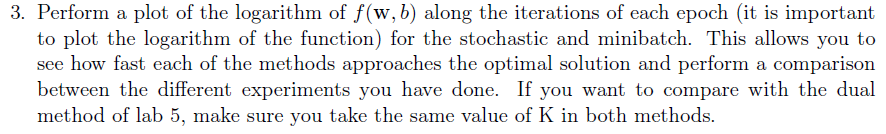

x:(10, 100) Y:(100, 100) C:(100, 200) d:(200,)
Achieved result: -5020314257.59


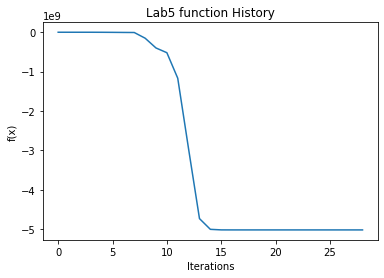

Achieved result: 13.51


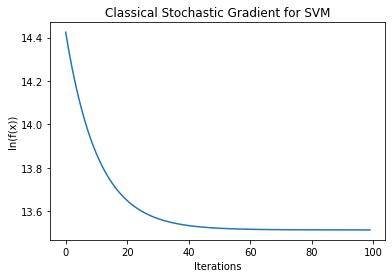

Achieved result: 13.44


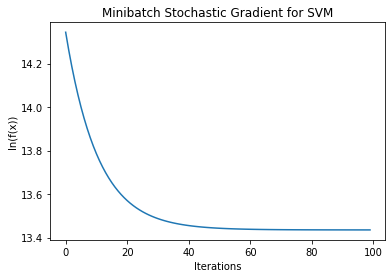

In [46]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from utilities import *


def gen_dataset(n, separable=True):
    m1 = [0. ,0.]
    s1 = [[1, -0.9],[-0.9,1]]
    c1 = np.random.multivariate_normal(m1,s1,n//2)
#    x1 = c1[:,0]
#    y1 = c1[:,1]

    if separable == True:
        m2 = [3. ,6.]
        s2 = s1
    if separable == False:
        m2 = [1. ,2.]
        s2 = [[1, 0],[0,1]]
    c2 = np.random.multivariate_normal(m2,s2,n//2)
#    x2 = c2[:,0]
#    y2 = c2[:,1]
    x = np.concatenate((c1,c2), axis=0)
    y = np.concatenate(([1]*(n//2), [-1]*(n//2)), axis=0)
    return x, y

def prob_dual_gen(x, y, K):
    def prob_dual(n):
        return prob_dual_complete(n, x, y, K)
    return prob_dual

def prob_dual_complete(n, x, y, K):

    Y = np.diag(y)

    p = 1
    m = 2*n
    N = n + p + 2*m
    #K = 100.
    A = y.reshape(n,1)
    b = np.array([0])
    G = -Y @ x.T @x @ Y
    g = np.array([1.]*n)
    C = np.concatenate((np.eye(n),-np.eye(n)), axis=0).T
    d = np.concatenate(([0.]*n, [-K]*n))
    #z = np.zeros(N)
    #z = np.array([1.]*N)
    z = np.random.rand(N)
    z[-2*m:] = 1.
    print('x:%s Y:%s C:%s d:%s' %(x.shape, Y.shape,  C.shape, d.shape))
    return z, G, A, C, g, b, d, n, m, p

def lab5(x,y,n, K, n_epochs, plot=False):
    prob_dual = prob_dual_gen(x.T, y, K)
    _, _, history =  optimization(n, prob_dual, s0, np.linalg.solve, cond_nb=False, niter=n_epochs)
    print("Achieved result: %.2f" % history[-1])
    if plot:
            plt.plot(history)
            plt.title("Lab5 function History")
            plt.ylabel("f(x)")
            plt.xlabel("Iterations")
            plt.show()

K = 100
n_epochs = 100
n_samples = 100
# X, y = gen_dataset(n=n_samples, separable=True)
X, y = load_data(n_samples=n_samples, n_features=10, random_state=1)
lab5(X, y, n=n_samples, K=K, n_epochs=n_epochs, plot=True)
stochastic_gradient(X, y, K, n_epochs=n_epochs, plot=True)
stochastic_gradient(X, y, K, n_batch=20, n_epochs=n_epochs, plot=True)
